# Netflix Movies and TV Shows - Data Analysis

## Goal

The world of entertainment has undergone a seismic shift with the emergence of streaming platforms like Netflix. As an unprecedented repository of diverse movies and TV shows, Netflix offers a rich dataset for exploration and analysis. This project delves into the extensive collection of Netflix content using Python, aiming to uncover insights and patterns within this vast database.

## Setup

### Importing the necessary libraries and Reading in the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
netflix_raw = pd.read_csv(r'C:\Users\dtlop\OneDrive\Ambiente de Trabalho\Data Analysis\Portfolio\Netflix Movies and TV Shows\netflix_titles.csv')

### Looking at the data

In [3]:
netflix_raw.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data Cleaning

### Checking for missing data

In [4]:
print(netflix_raw.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


### Removing null values

In [5]:
netflix_filtered = netflix_raw.dropna()
print(netflix_filtered.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


### Checking and Removing duplicates

In [6]:
duplicate_rows = netflix_filtered[netflix_filtered.duplicated()]
print(duplicate_rows)

netflix_filtered = netflix_filtered.drop_duplicates()

duplicate_rows = netflix_filtered[netflix_filtered.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []
Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []


### Checking the data type of the columns

In [7]:
print(netflix_raw.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


### Convert date format

In [8]:
netflix_filtered['date_added'] = pd.to_datetime(netflix_filtered['date_added'], errors='coerce')
print(netflix_filtered.isnull().sum())

netflix_filtered = netflix_filtered.dropna()
print(netflix_filtered.isnull().sum())


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      4
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


### Add year_added column

In [9]:
netflix_filtered['year_added'] = netflix_filtered['date_added'].dt.year
netflix_filtered.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021


### Checking for Outliers

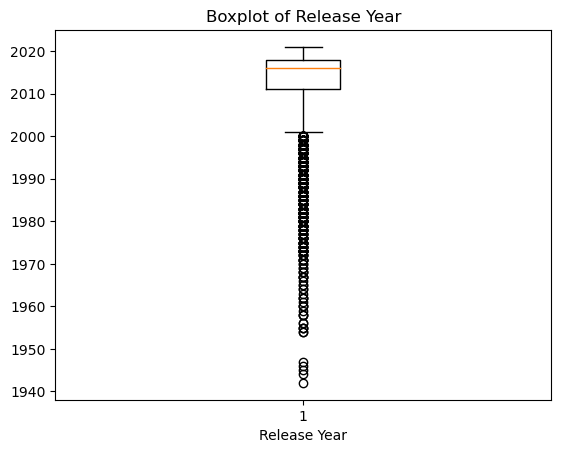

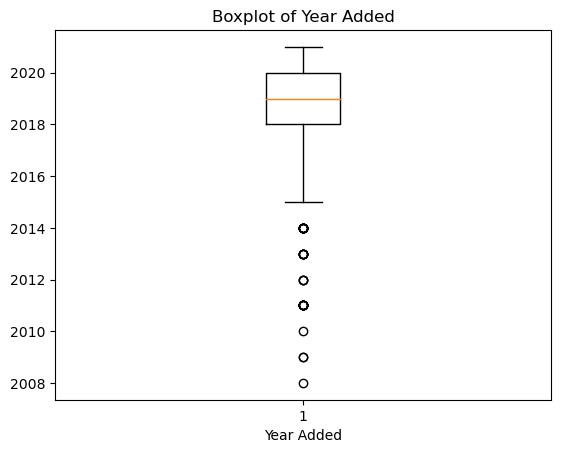

In [10]:
plt.boxplot(netflix_filtered['release_year'])
plt.xlabel('Release Year')
plt.title('Boxplot of Release Year')
plt.show()

plt.boxplot(netflix_filtered['year_added'])
plt.xlabel('Year Added')
plt.title('Boxplot of Year Added')
plt.show()

### Removing Outliers

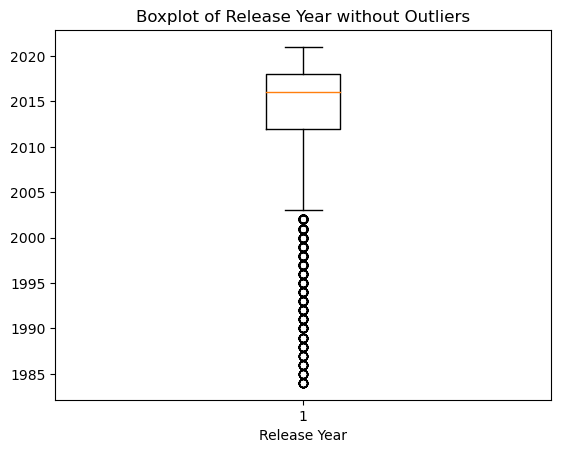

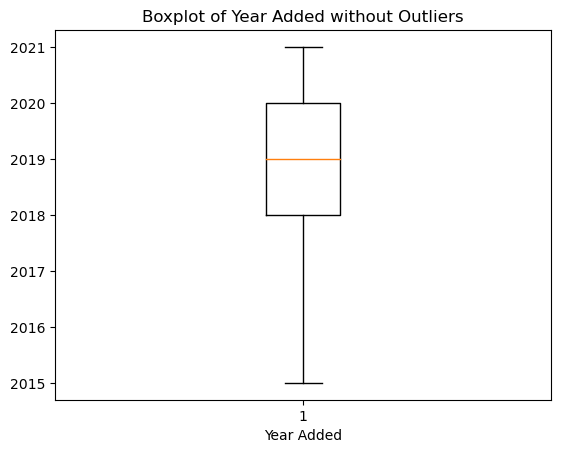

In [11]:
z_scores = stats.zscore(netflix_filtered['release_year'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
netflix_filtered = netflix_filtered[filtered_entries]

plt.boxplot(netflix_filtered['release_year'])
plt.xlabel('Release Year')
plt.title('Boxplot of Release Year without Outliers')
plt.show()

z_scores = stats.zscore(netflix_filtered['year_added'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
netflix_filtered = netflix_filtered[filtered_entries]

plt.boxplot(netflix_filtered['year_added'])
plt.xlabel('Year Added')
plt.title('Boxplot of Year Added without Outliers')
plt.show()

## Data Exploration

### Statistical Summary

In [12]:
netflix_filtered['release_year'].describe()

count    5141.000000
mean     2013.931531
std         6.771017
min      1984.000000
25%      2012.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

In [13]:
netflix_filtered['year_added'].describe()

count    5141.000000
mean     2018.873371
std         1.431209
min      2015.000000
25%      2018.000000
50%      2019.000000
75%      2020.000000
max      2021.000000
Name: year_added, dtype: float64

### Distribution of Release Years

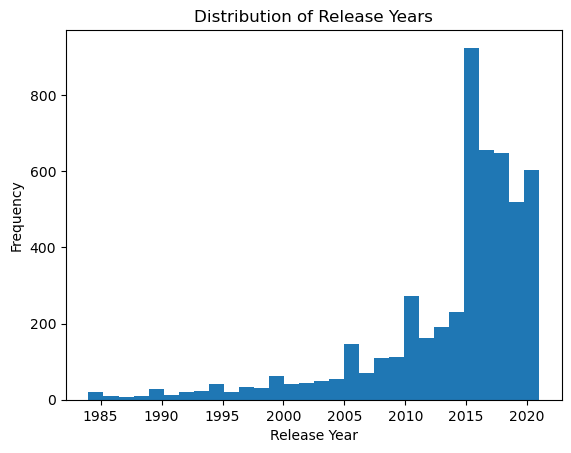

In [14]:
plt.hist(netflix_filtered['release_year'], bins=30)
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Distribution of Release Years')
plt.show()

 ### Distribution of different types (Movies/TV Shows)

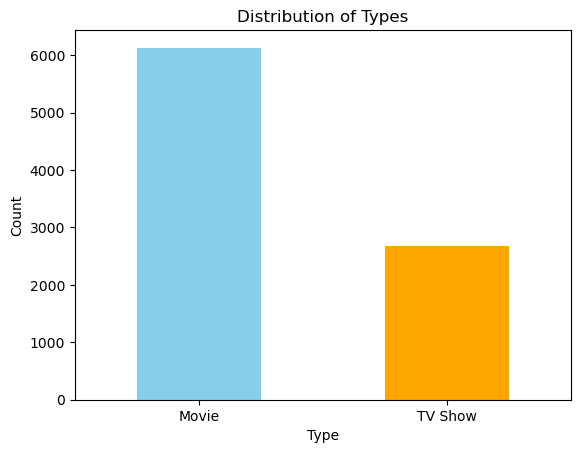

In [15]:
netflix_raw['type'].value_counts().plot(kind='bar', rot=0, color = ['skyblue', 'orange'])
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Types')
plt.show()

### Analyze trends over time

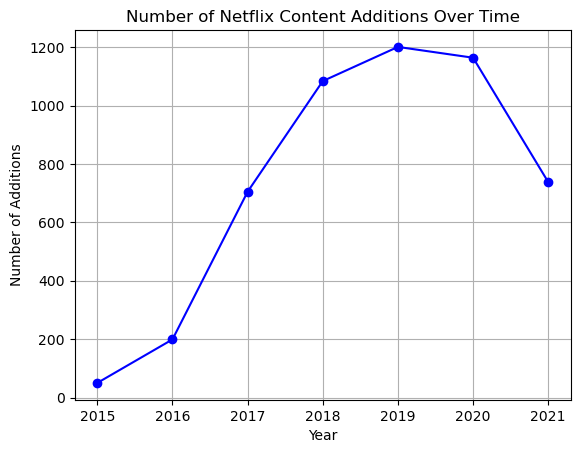

In [16]:
netflix_filtered['year_added'].value_counts().sort_index().plot(kind='line', marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Additions')
plt.title('Number of Netflix Content Additions Over Time')
plt.grid(True)
plt.show()

### Additions per Year by Type (Movies/TV Shows)

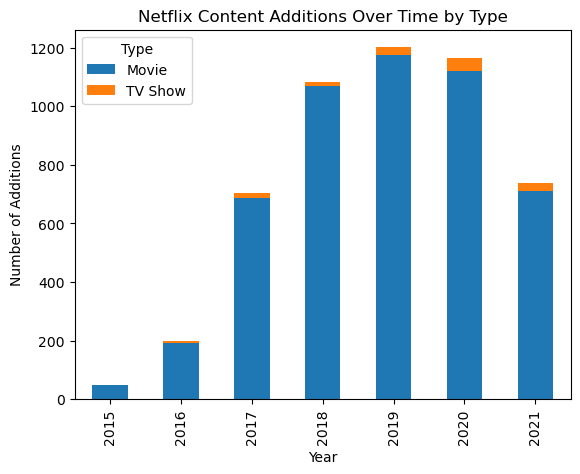

In [17]:
yearly_type_counts = netflix_filtered.pivot_table(index='year_added', columns='type', aggfunc='size', fill_value=0).plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Number of Additions')
plt.title('Netflix Content Additions Over Time by Type')
plt.legend(title='Type')
plt.show()

### Distribution of Movie Durantions

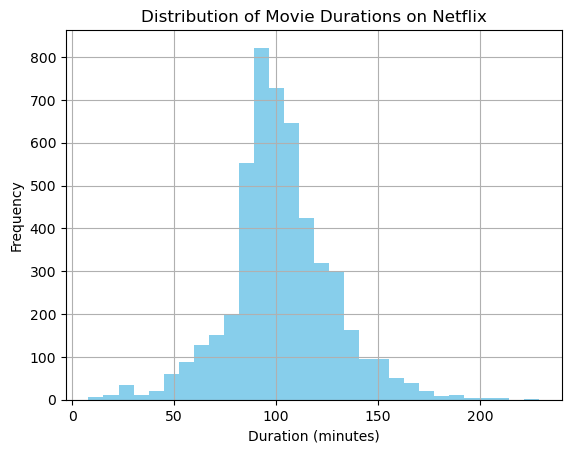

In [18]:
movies_data = netflix_filtered[netflix_filtered['type'] == 'Movie']
movies_data.loc[:, 'duration'] = movies_data['duration'].str.replace(' min', '').astype(float)

plt.hist(movies_data['duration'], bins=30, color='skyblue')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Durations on Netflix')
plt.grid(True)
plt.show()


### Countries with most content

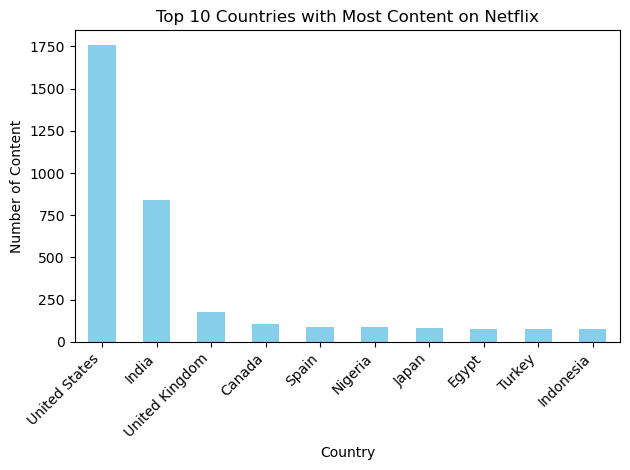

In [19]:
top_countries = netflix_filtered['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Content')
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


### Correlation Matrix

In [20]:
netflix_numerized = netflix_filtered

for column in netflix_numerized.columns:
    if netflix_numerized[column].dtype == 'object': 
        try:
            netflix_numerized[column]= netflix_numerized[column].astype('category')
            netflix_numerized[column] = netflix_numerized[column].cat.codes
        except ValueError:
            continue 

print(netflix_numerized.dtypes)

show_id                  int16
type                      int8
title                    int16
director                 int16
cast                     int16
country                  int16
date_added      datetime64[ns]
release_year             int64
rating                    int8
duration                 int16
listed_in                int16
description              int16
year_added               int32
dtype: object


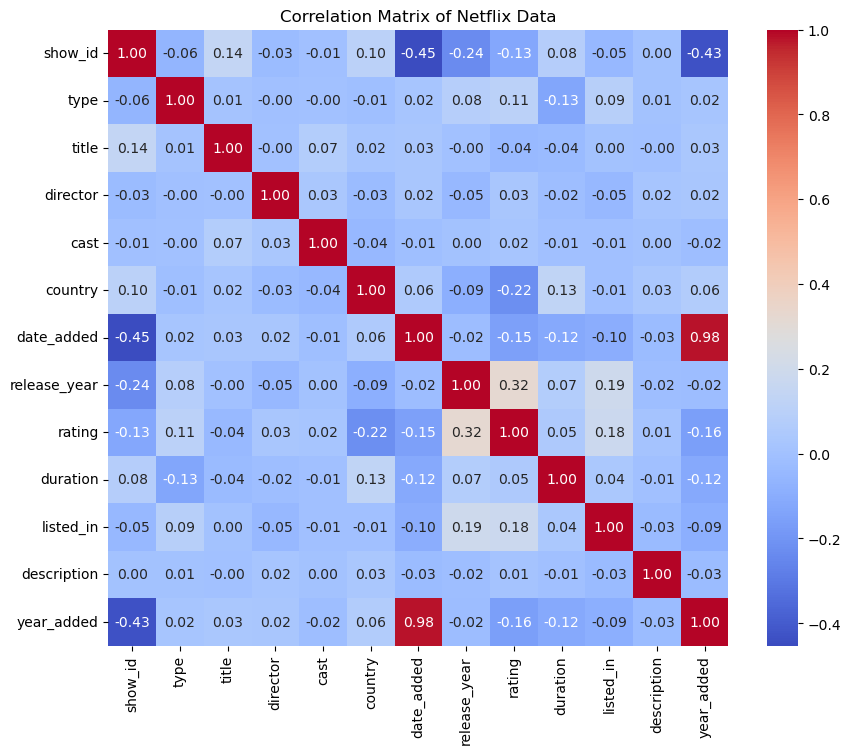

In [21]:
correlation_matrix = netflix_numerized.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Netflix Data')
plt.show()